In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [71]:
cats = ['User_ID','Occupation','Marital_Status','Product_Category']
for cat in cats:
    df[cat] = df[cat].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [72]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [73]:
df.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


## Removing outliers form male and female customers

In [79]:
df_males = df[df['Gender'] == 'M']
df_females = df[df['Gender']=='F']

In [80]:
df_males['Purchase'].sum()/df['Purchase'].sum()

0.7672142399929656

In [81]:
df_females['Purchase'].sum()/df['Purchase'].sum()

0.2327857600070344

In [104]:
def find_outliers(data):
    Q1,Q3 = np.percentile(data['Purchase'],[25,75])
    IQR = Q3 - Q1
    lb = Q1 - 1.5*IQR
    ub = Q3 + 1.5*IQR
    return pd.DataFrame(data['Purchase'].loc[(data['Purchase']>lb) & (data['Purchase']<ub)])

In [106]:
a = find_outliers(df_males)
a.mean()

Purchase    9375.837603
dtype: float64

In [111]:
def bootstrap(arr,confidence,nsample=100,size=1000):
    xbar = list()
    for _ in range(nsample):
        sample = np.random.choice(arr,size,replace=False)
        xbar.append(np.array(sample).mean())
    per1 = np.percentile(xbar,100*(1-confidence)/2)
    per2 = np.percentile(xbar,100*(1-(1-confidence)/2))
    sns.histplot(xbar,bins=20)
    plt.axvline(x=per1,c="r")
    plt.axvline(x=per2,c='r')
    plt.show()
    
    print(f"Sample mean: {np.array(xbar).mean()}")
    print(f"Sample Standard deviation: {np.array(xbar).std()}")
    print(f"Standard error: {np.array(xbar).std()/np.sqrt(size)}")
    print(f"Confidence is in range[{per1} ,{per2}")
   

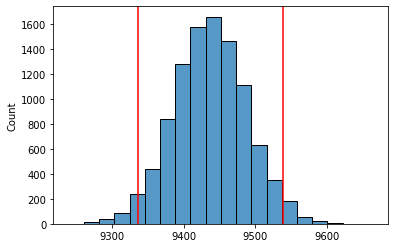

Sample mean: 9436.9705136
Sample Standard deviation: 51.0587831916244
Standard error: 0.510587831916244
Confidence is in range[9336.641295 ,9539.37279


In [117]:
 bootstrap(df_males['Purchase'],0.95,10000,10000)

In [114]:
trueMean_males = df_males['Purchase'].mean()
trueMean_males

9437.526040472265

In [115]:
female_purchase = find_outliers(df_females)
female_purchase.mean()

Purchase    8538.524637
dtype: float64

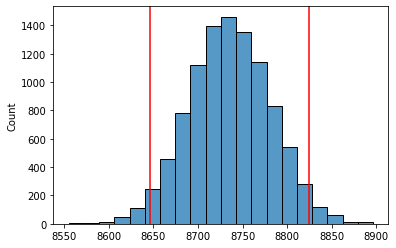

Sample mean: 8735.480197709998
Sample Standard deviation: 45.89554021179885
Standard error: 0.4589554021179885
Confidence is in range[8646.42544 ,8824.7183025


In [116]:
bootstrap(df_females['Purchase'],0.95,10000,10000)

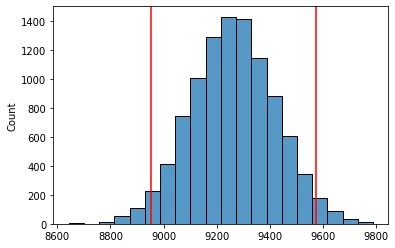

Sample mean: 9262.8921497
Sample Standard deviation: 158.28379033325203
Standard error: 5.005372941376185
Confidence is in range[8954.651375000001 ,9575.1174


In [120]:
 bootstrap(df['Purchase'],0.95,10000,1000)

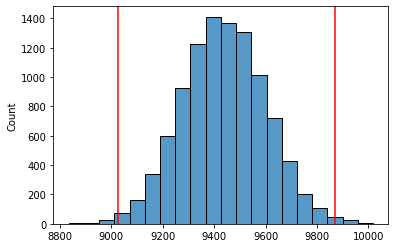

Sample mean: 9437.464329500002
Sample Standard deviation: 161.76906629267577
Standard error: 5.115587044436262
Confidence is in range[9027.511055 ,9869.915445


In [121]:
 bootstrap(df_males['Purchase'],0.99,10000,1000)

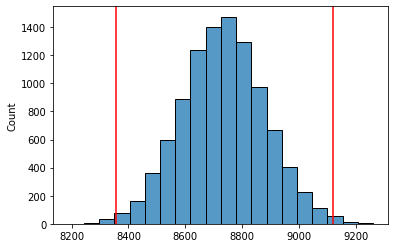

Sample mean: 8733.9930607
Sample Standard deviation: 147.1021014696439
Standard error: 4.651776892412771
Confidence is in range[8356.700084999999 ,9118.679619999999


In [122]:
 bootstrap(df_females['Purchase'],0.99,10000,1000)

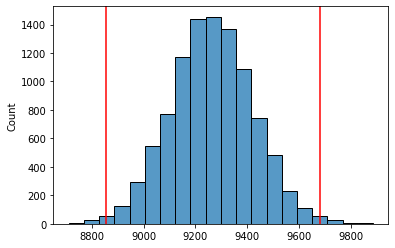

Sample mean: 9262.886422299998
Sample Standard deviation: 158.6290557207234
Standard error: 5.016291191592487
Confidence is in range[8852.517755 ,9683.108194999999


In [123]:
 bootstrap(df['Purchase'],0.99,10000,1000)

In [44]:
df_users = df.groupby('User_ID')

In [57]:
df_users[:]

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,
1000001,F,0-17,10,A,2,0
1000002,M,55+,16,C,4+,0
1000003,M,26-35,15,A,3,0
1000004,M,46-50,7,B,2,1
1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...
1006036,F,26-35,15,B,4+,1
1006037,F,46-50,1,C,4+,0
1006038,F,55+,1,C,2,0


In [46]:
#Total purchase by gender
df.groupby('Gender')['Purchase'].sum().reset_index()

,Gender,Purchase
0,F,1186232642
1,M,3909580100


In [47]:
#Total purchase by gender
(df.groupby('Gender')['Purchase'].sum()/df.groupby('Gender')['Purchase'].sum().sum()).reset_index()

,Gender,Purchase
0,F,0.232786
1,M,0.767214


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

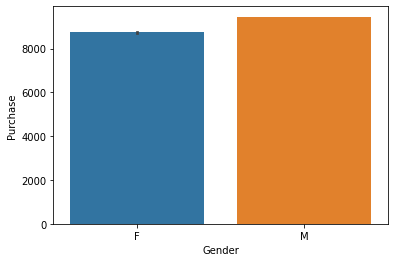

In [48]:
sns.barplot(x='Gender',y='Purchase',estimator=np.mean,data=df)

In [49]:
df.groupby('Gender')['Purchase'].mean().reset_index()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

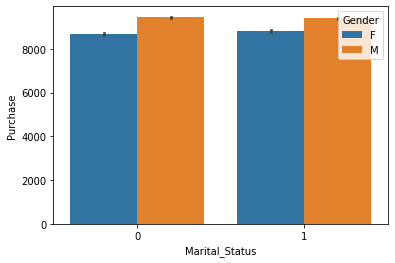

In [50]:
sns.barplot(x="Marital_Status",y="Purchase",data=df,hue="Gender",estimator=np.mean)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

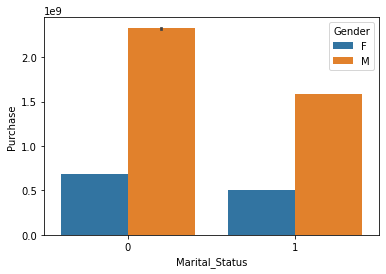

In [51]:
sns.barplot(x="Marital_Status",y="Purchase",hue="Gender",data=df,estimator=np.sum)

<AxesSubplot:xlabel='index', ylabel='Age'>

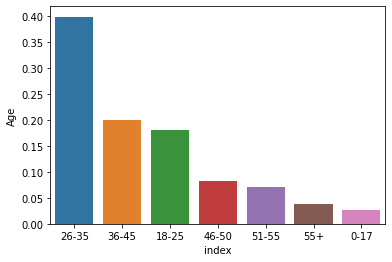

In [52]:
sns.barplot(x='index',y='Age',data=df['Age'].value_counts(normalize=True).reset_index())

In [53]:
#Unique customers
df_users = df.groupby('User_ID')['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'].max()
df_users

C:\Users\yasee\AppData\Local\Temp\ipykernel_6100\4228023115.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_users = df.groupby('User_ID')['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'].max()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,
1000001,F,0-17,10,A,2,0
1000002,M,55+,16,C,4+,0
1000003,M,26-35,15,A,3,0
1000004,M,46-50,7,B,2,1
1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...
1006036,F,26-35,15,B,4+,1
1006037,F,46-50,1,C,4+,0
1006038,F,55+,1,C,2,0


In [54]:
df_usersPurchase = df.groupby("User_ID")['Purchase'].sum()

In [55]:
df_UniqueCustomers = pd.merge(df_users,df_usersPurchase,on='User_ID').reset_index()

In [56]:
df_UniqueCustomers

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058
5887,1006037,F,46-50,1,C,4+,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4+,1,590319


Text(0.5, 1.0, 'Customer % by Gender')

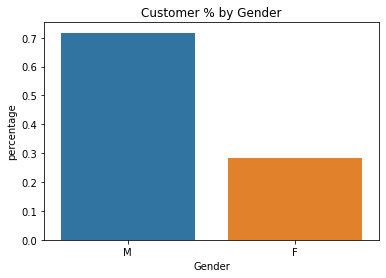

In [19]:
sns.barplot(x="index",y='Gender',data=df_UniqueCustomers['Gender'].value_counts(normalize=True).reset_index())
plt.xlabel('Gender')
plt.ylabel('percentage')
plt.title('Customer % by Gender')

Text(0.5, 1.0, "Customer's Marital status by Percentage")

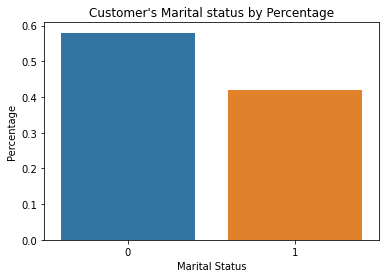

In [20]:
sns.barplot(x='index',y='Marital_Status',data=df_UniqueCustomers['Marital_Status'].value_counts(normalize=True).reset_index())
plt.xlabel("Marital Status")
plt.ylabel('Percentage')
plt.title("Customer's Marital status by Percentage")

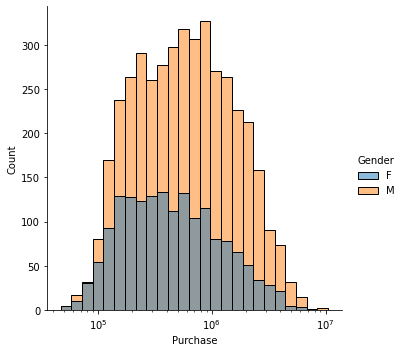

In [21]:
sns.displot(x='Purchase',data=df_UniqueCustomers,hue="Gender",log_scale=True,bins=25)

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

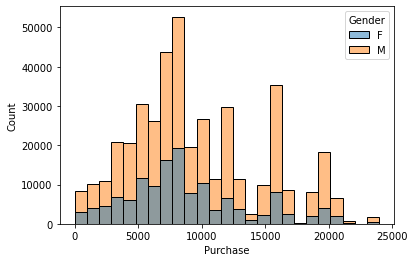

In [22]:
sns.histplot(x='Purchase',data=df,hue='Gender',bins=25)

Text(0.5, 1.0, 'Purchase amount per transaction')

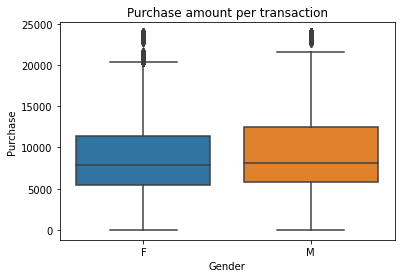

In [23]:
sns.boxplot(x='Gender',y='Purchase',data=df)
plt.title('Purchase amount per transaction')

Text(0.5, 1.0, 'Purchase amount per customer')

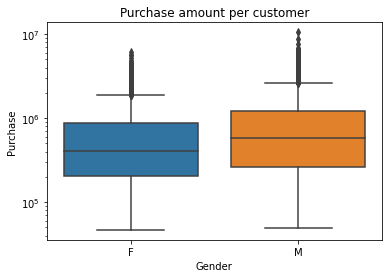

In [24]:
ax = sns.boxplot(x='Gender',y='Purchase',data=df_UniqueCustomers)
ax.set_yscale('log')
plt.title('Purchase amount per customer')

In [25]:
print('Mean purchase value for male without treating outliers =',df_UniqueCustomers[df_UniqueCustomers["Gender"] == "M"]['Purchase'].mean())
print('Mean purchase value for female without treating outliers =',df_UniqueCustomers[df_UniqueCustomers["Gender"] == "F"]['Purchase'].mean())

Mean purchase value for male without treating outliers = 925344.4023668639
Mean purchase value for female without treating outliers = 712024.3949579832


In [26]:
def remove_outliers(col):
    sorted(col)
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lr = q1 - (1.5*iqr)
    ur = q3 + (1.5*iqr)
    return lr,ur


In [27]:
lr,ur = remove_outliers(df_UniqueCustomers['Purchase'])
lr,ur

(-1084679.25, 2441606.75)

In [28]:
df_UniqueCustomers.where(df_UniqueCustomers['Purchase']>ur,np.nan,inplace=True)


In [29]:
df_UniqueCustomers['Purchase'].isnull().sum()

5482

In [30]:
df_UniqueCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     409 non-null    float64
 1   Gender                      409 non-null    object 
 2   Age                         409 non-null    object 
 3   Occupation                  409 non-null    float64
 4   City_Category               409 non-null    object 
 5   Stay_In_Current_City_Years  409 non-null    object 
 6   Marital_Status              409 non-null    float64
 7   Purchase                    409 non-null    float64
dtypes: float64(4), object(4)
memory usage: 368.3+ KB


In [31]:
df_UniqueCustomers

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5886,1006036.0,F,26-35,15.0,B,4+,1.0,4116058.0
5887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
